In [4]:
import sys

sys.path.append("..")

In [5]:
import pandas as pd
from llavart.models.retriever.multimodal_sent_embedder import MultiModalSentEmbedder
from llavart.utils.dirutils import get_data_dir
from transformers import AutoTokenizer, CLIPProcessor
from PIL import Image
from datasets import load_dataset
import lovely_tensors as lt
import torch

lt.monkey_patch()

/home/nicola/miniconda3/envs/vitart/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dataset = load_dataset("google/wit")

/home/nicola/miniconda3/envs/vitart/lib/python3.11/site-packages/datasets/load.py:1461: FutureWarning: The repository for google/wit contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/wit
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['language', 'page_url', 'image_url', 'page_title', 'section_title', 'hierarchical_section_title', 'caption_reference_description', 'caption_attribution_description', 'caption_alt_text_description', 'mime_type', 'original_height', 'original_width', 'is_main_image', 'attribution_passes_lang_id', 'page_changed_recently', 'context_page_description', 'context_section_description'],
        num_rows: 37046386
    })
})

In [3]:
texts = []
images = []
for i in range(2):
    texts.append(df["paragraph"][i])
    images.append(Image.open(get_data_dir() / "wikipedia_images" / df["file_name"][i]))

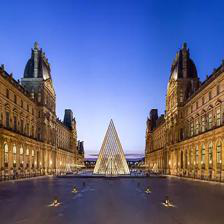

'Architecture is the process and the product of planning, designing, and constructing buildings or any other structures. Architectural works, in the material form of buildings, are often perceived as cultural symbols and as works of art. Historical civilizations are often identified with their surviving architectural achievements.'

In [4]:
display(images[0])
texts[0]

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/multi-qa-MiniLM-L6-cos-v1")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = MultiModalSentEmbedder("sentence-transformers/multi-qa-MiniLM-L6-cos-v1")
model.to(device)

MultiModalSentEmbedder(
  (clip_model): CLIPModel(
    (text_model): CLIPTextTransformer(
      (embeddings): CLIPTextEmbeddings(
        (token_embedding): Embedding(49408, 512)
        (position_embedding): Embedding(77, 512)
      )
      (encoder): CLIPEncoder(
        (layers): ModuleList(
          (0-11): 12 x CLIPEncoderLayer(
            (self_attn): CLIPAttention(
              (k_proj): Linear(in_features=512, out_features=512, bias=True)
              (v_proj): Linear(in_features=512, out_features=512, bias=True)
              (q_proj): Linear(in_features=512, out_features=512, bias=True)
              (out_proj): Linear(in_features=512, out_features=512, bias=True)
            )
            (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (mlp): CLIPMLP(
              (activation_fn): QuickGELUActivation()
              (fc1): Linear(in_features=512, out_features=2048, bias=True)
              (fc2): Linear(in_features=2048, out_features=512

In [6]:
text_inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt").to(device)
image_inputs = processor(images=images, return_tensors="pt").to(device)
text_inputs, image_inputs

({'input_ids': tensor[2, 115] i64 n=230 (1.8Kb) x∈[0, 27464] μ=3.122e+03 σ=4.689e+03 cuda:0, 'token_type_ids': tensor[2, 115] i64 n=230 (1.8Kb) all_zeros cuda:0, 'attention_mask': tensor[2, 115] i64 n=230 (1.8Kb) x∈[0, 1] μ=0.739 σ=0.440 cuda:0},
 {'pixel_values': tensor[2, 3, 224, 224] n=301056 (1.1Mb) x∈[-1.792, 2.146] μ=0.498 σ=1.104 cuda:0})

In [7]:
image_inputs

{'pixel_values': tensor[2, 3, 224, 224] n=301056 (1.1Mb) x∈[-1.792, 2.146] μ=0.498 σ=1.104 cuda:0}

In [9]:
model(**image_inputs)

tensor[2, 384] n=768 (3Kb) x∈[-0.156, 0.163] μ=-0.002 σ=0.051 grad DivBackward0 cuda:0